# Project Akhir Pembelajaran Mesin
### Anggota Kelompok:
- Affandra Fahrezi (2110511001)
- Karunia Agustiani (2110511002)
- Regina Faraz Labila (2110511010)
- Muhammad Hykal Nurhakim (2110511024)
- Muhammad Teguh Prananto (2110511036)

## Prediksi Job Applicant 

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Membaca Data dan Inspeksi data

In [45]:
df = pd.read_csv('jobapplicant.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [46]:
change_type = {"Employment":object, "Employed":object}
df = df.astype(change_type)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  object 
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 8.4+ MB


### Pilih kolom berdasarkan jenis data dan melihat distribusi data

In [47]:
df['Employed'].value_counts()

1    39392
0    34070
Name: Employed, dtype: int64

In [48]:
category = df.select_dtypes(['object'])
category.drop(['HaveWorkedWith', 'Country'], axis=1, inplace=True)
len(category.columns)

8

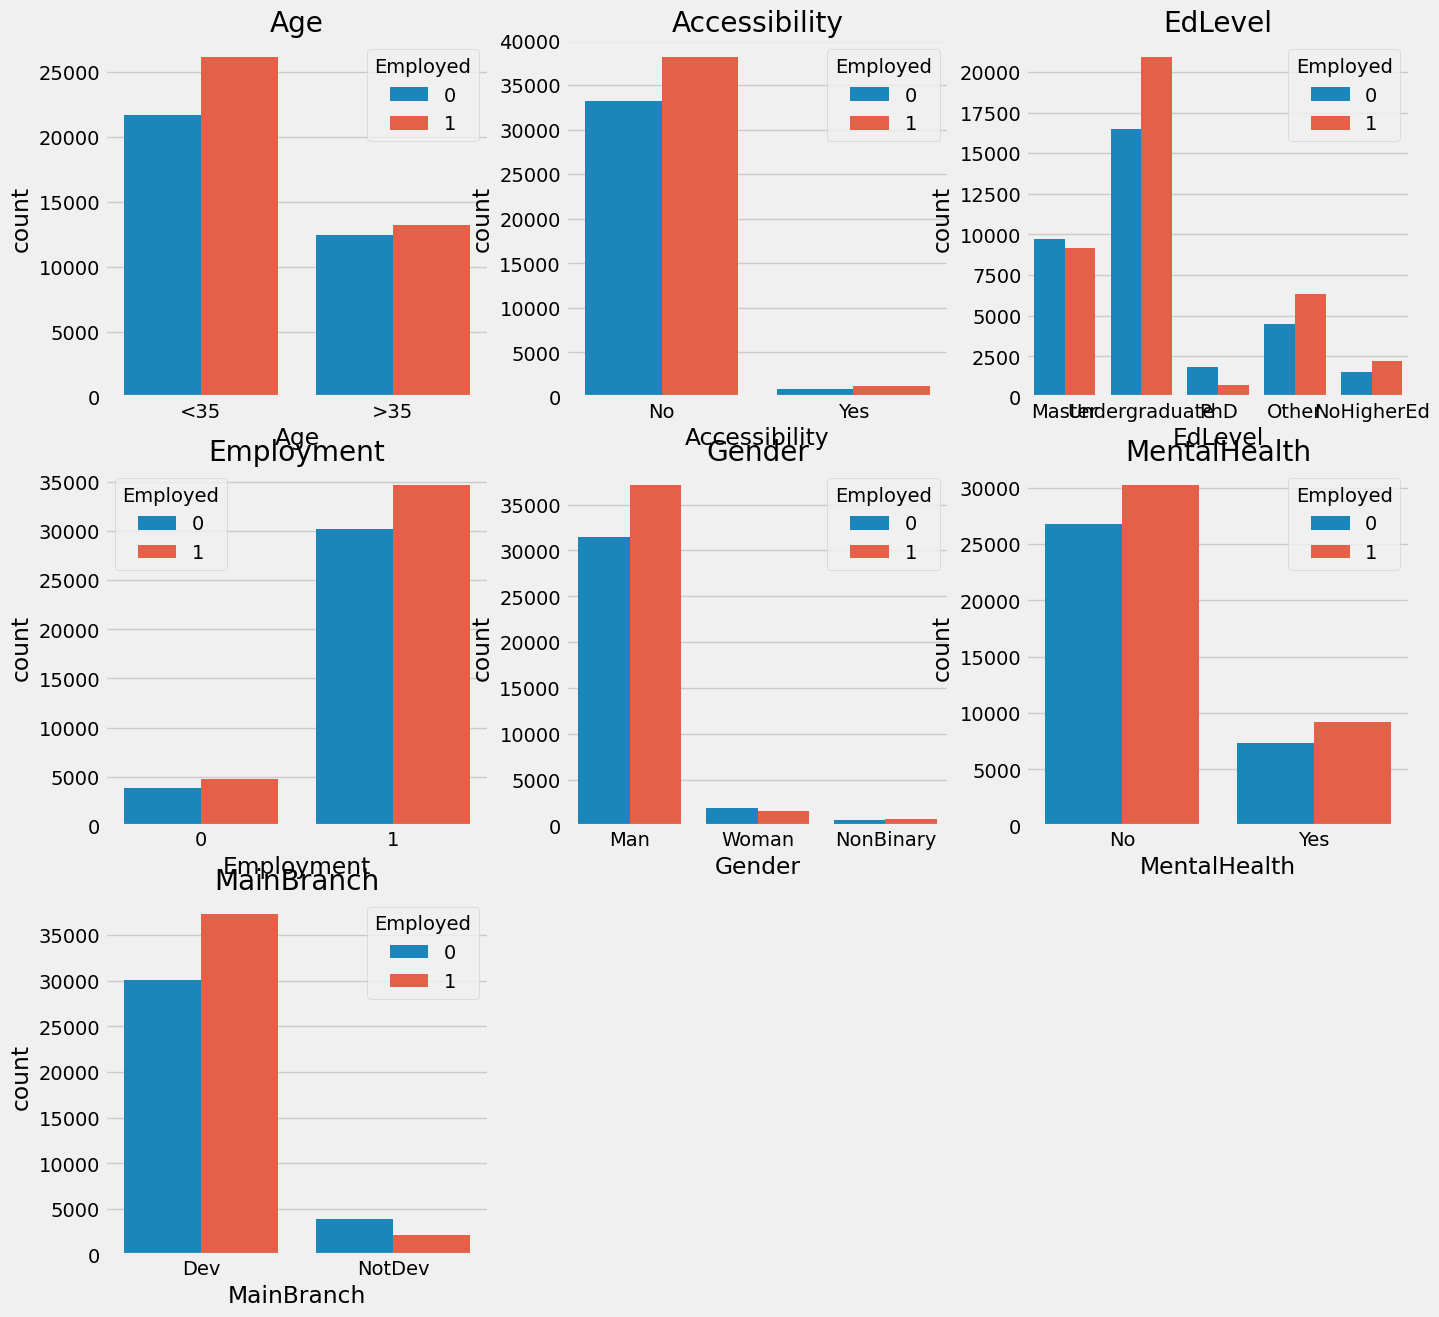

In [25]:
plt.figure(figsize=(15,15))
for i, column in enumerate(category.columns):
    if(column=='Employed'):
        continue
    plt.subplot(3, 3, i+1)
    sns.countplot(x=column, data=category, hue='Employed')
    plt.title(column)
    

In [49]:
numerik = df.select_dtypes(['int64', 'float64'])
numerik = pd.concat([numerik, df['Employed']], axis=1)
numerik.drop(['Unnamed: 0'], axis=1, inplace=True)

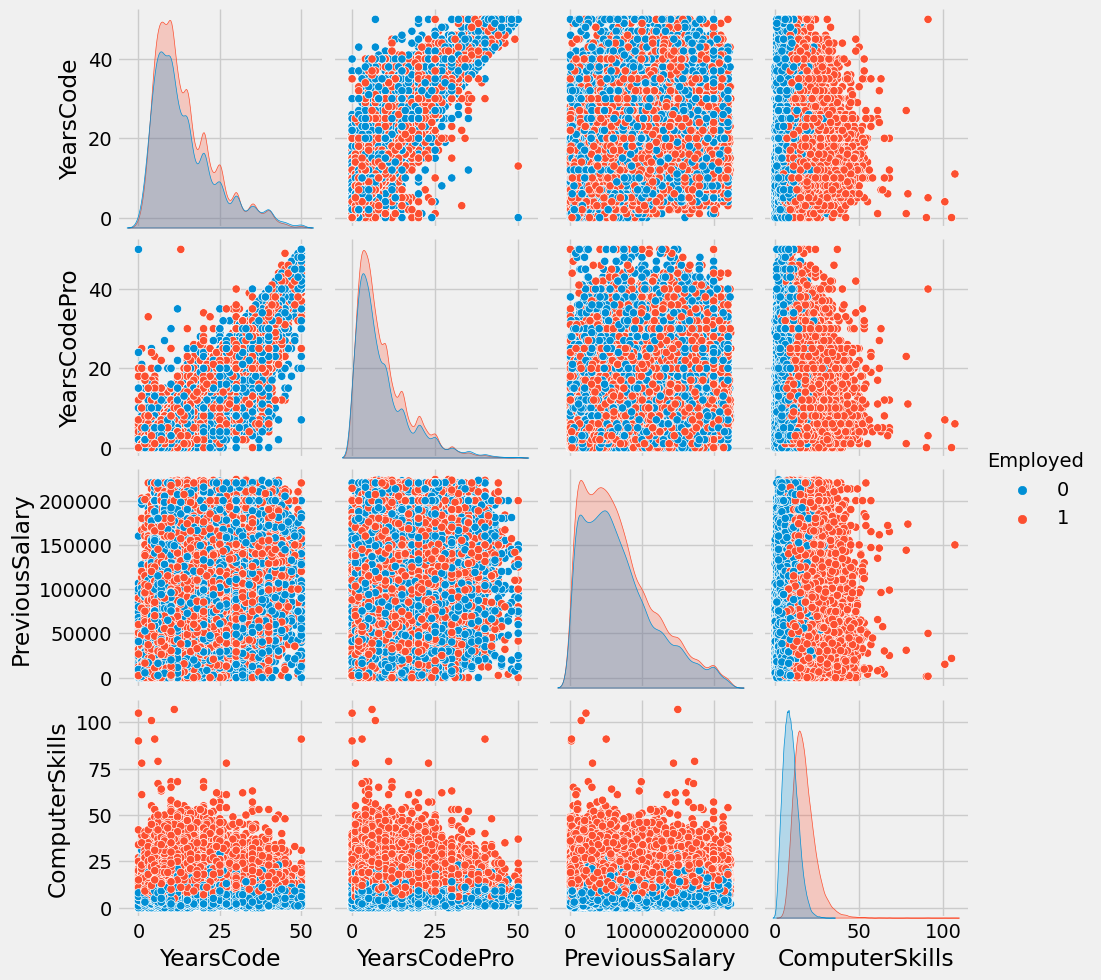

In [27]:
sns.pairplot(numerik, hue='Employed')

### Pilih Kolom yang akan digunakan

In [50]:
df_used = df[['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 
                   'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills', 'Employed']]
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  object 
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   PreviousSalary  73462 non-null  float64
 10  ComputerSkills  73462 non-null  int64  
 11  Employed        73462 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 6.7+ MB


### Preprocess Data

In [51]:
# Drop Gender == NonBinary
non_binary = df_used[df_used['Gender']=='NonBinary']
df_used.drop(non_binary.index, axis=0, inplace=True)
df_used

C:\Users\Anan\AppData\Local\Temp\ipykernel_17756\942099569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used.drop(non_binary.index, axis=0, inplace=True)


,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,51552.0,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,46482.0,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,77290.0,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,46135.0,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,160932.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73456,<35,No,Master,1,Man,Yes,Dev,7,5,94000.0,5,0
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,41058.0,13,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,115000.0,11,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,57720.0,12,1


### Drop outlier dan Encoding

In [80]:
def remove_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = data[(data[column]<=lower_bound) & (data[column]>=upper_bound)]
    data.drop(outlier.index, axis=0)
    return data


In [81]:
from sklearn.preprocessing import LabelEncoder

# Melakukan teknik encoding pada kolom kategorik
encoder = LabelEncoder()
category = df_used.select_dtypes(['object'])
for column in category.columns:
    category[column] = encoder.fit_transform(category[column])

numerik = df_used.select_dtypes(['int64', 'float64'])
for column in numerik.columns:
    numerik = remove_outlier(numerik, column)
    
df = pd.concat([numerik,category], axis=1)
df

,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,Employed
0,7,4,51552.0,4,0,0,0,1,0,0,0,0
1,12,5,46482.0,12,0,0,4,1,0,0,0,1
2,15,6,77290.0,7,0,0,0,1,0,0,0,0
3,9,6,46135.0,13,0,0,4,1,0,0,0,0
4,40,30,160932.0,2,1,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73456,7,5,94000.0,5,0,0,0,1,0,1,0,0
73457,7,2,41058.0,13,0,0,4,1,0,0,0,1
73458,21,16,115000.0,11,1,0,4,1,0,0,0,1
73459,4,3,57720.0,12,0,0,4,1,0,0,0,1


### Melihat korelasi antar variabel

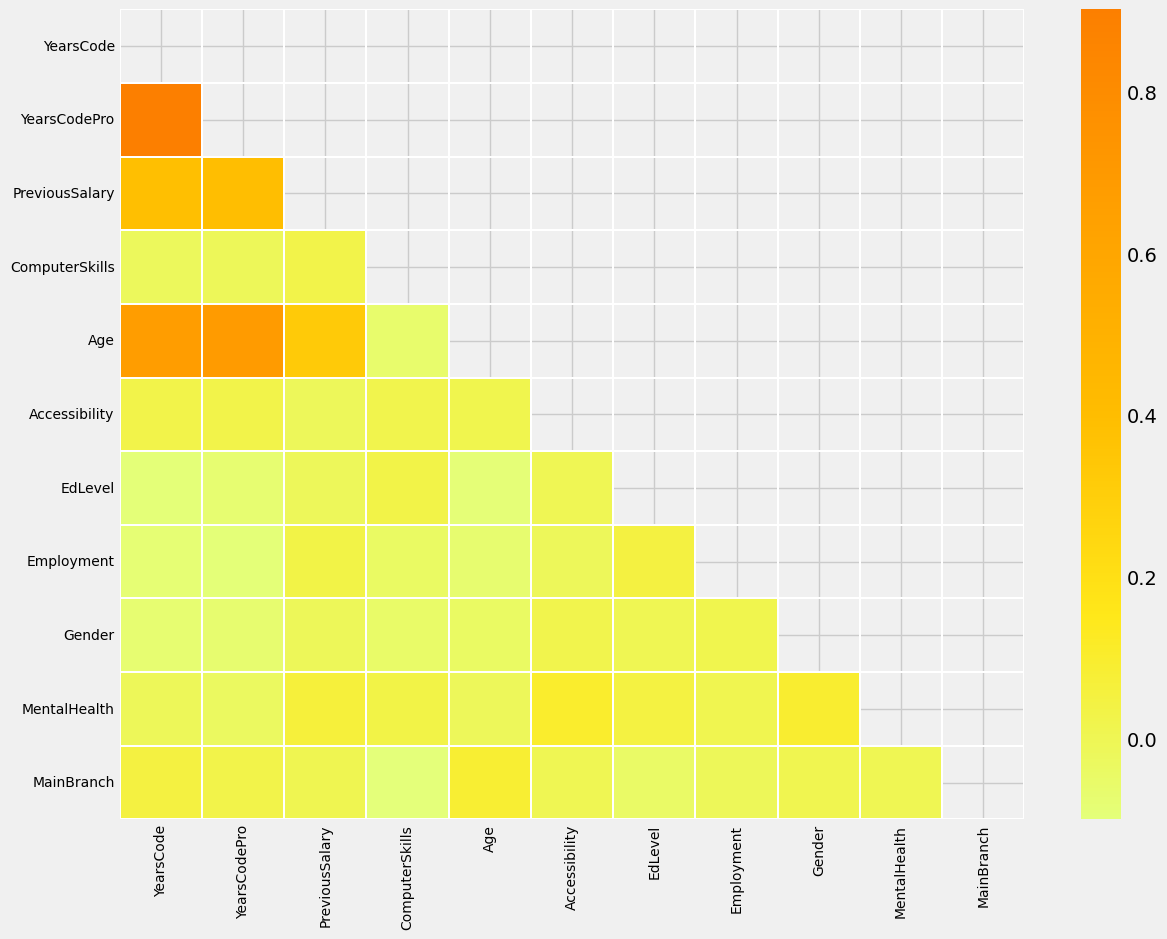

In [32]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.style.use('fivethirtyeight')

corr = df.iloc[:, :-1].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask=mask, cmap='Wistia', linewidths=.2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [83]:
# Memisahkan antara column fitur dan column target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [84]:
from sklearn.model_selection import train_test_split

#Membagi antara train data 70% dengan test data 30% dari keseluruhan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(50463, 21628)

### Membuat dan Melatih Model Random Forest dengan parameter terbaik

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, scoring='roc_auc')

# Mengambil parameter terbaik
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [89]:
# Train model dengan best parameter
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

### Evaluasi Model Random Forest

In [90]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluasi prediksi data train
y_pred = rf.predict(X_train)
cr = classification_report(y_pred, y_train)
accuracy = accuracy_score(y_pred, y_train)

print(cr)
print(f"Akurasi model mencapai {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.74      0.79      0.77     22000
           1       0.83      0.79      0.81     28463

    accuracy                           0.79     50463
   macro avg       0.79      0.79      0.79     50463
weighted avg       0.79      0.79      0.79     50463

Akurasi model mencapai 0.79


In [91]:
# Evaluasi prediksi data test
y_pred = rf.predict(X_test)
cr = classification_report(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)

print(cr)
print(f"Akurasi model mencapai {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      9425
           1       0.82      0.79      0.81     12203

    accuracy                           0.79     21628
   macro avg       0.78      0.79      0.78     21628
weighted avg       0.79      0.79      0.79     21628

Akurasi model mencapai 0.79
